# 数据收集

## 导入需要的库

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import os

# 打开并评估twitter-archive-enhanced

In [335]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [336]:
twitter_archive_enhanced 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [337]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

通过上面的info，可以看出tweet_id, timestamp 类型错误，in_reply_to_status_id，in_reply_to_user_id 仅有78列，expanded_urls 含有空值，是没有照片的数据， 根据项目要求，这些数据后面需要删除

In [338]:
twitter_archive_enhanced.retweeted_status_id.notnull().value_counts()

False    2175
True      181
Name: retweeted_status_id, dtype: int64

retweeted_status_id 不为nan的为转发数据,181条转发数据，根据项目要求，这些数据后面需要删除

In [339]:
twitter_archive_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Tucker         10
Lola           10
Penny          10
Bo              9
Winston         9
Sadie           8
the             8
an              7
Bailey          7
Daisy           7
Buddy           7
Toby            7
Bella           6
Scout           6
Jack            6
Koda            6
Milo            6
Dave            6
Rusty           6
Jax             6
Oscar           6
Leo             6
Stanley         6
Chester         5
             ... 
Spark           1
Striker         1
Damon           1
Timmy           1
Pumpkin         1
Carter          1
Newt            1
Kirk            1
Harnold         1
Zeek            1
Tobi            1
Luther          1
Ronnie          1
Stuart          1
Sunshine        1
Walker          1
Ebby            1
Laika           1
Aiden           1
Ben             1
Crawford        1
Grizz           1
Jazzy           1
Traviss         1
Kloey     

In [340]:
twitter_archive_enhanced.text[twitter_archive_enhanced.name=='a'].iloc[1]

'Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq'

*55个名字为a的狗狗，调用一个名字为a的看了下，显然a不是狗狗的名字，是为质量问题                                               
*text里面含有链接

In [341]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

可见，rating_denominator不全为10

In [342]:
twitter_archive_enhanced.source.iloc[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

source中含有html文本

另外，这个数据集还有个整洁度问题，狗狗地位是一个变量，doggo,floofer, pupper, puppo应为一列

## 收集并评估image-predictions

In [343]:
folder_name ='pred-image'
if not os.path.exists(folder_name):
   os.makedirs(folder_name) 
 
url='https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [344]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [345]:
os.listdir(folder_name)

['image-predictions.tsv']

In [346]:
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [347]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [348]:
image_predictions.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

有66条重复的图片链接

tweet_id类型错误

## 打开并评估tweet_json

In [349]:
tweet_json = pd.DataFrame()

In [350]:
file = open('tweet_json.txt','r')
for line in file.readlines():
    dic = json.loads(line)
    tweet_id = dic['id']
    retweet_count = dic['retweet_count']
    favorite_count = dic['favorite_count']
    tem_df = pd.DataFrame({'tweet_id':tweet_id,
                      'retweet_count':retweet_count,
                      'favorite_count':favorite_count},index=[0])
    tweet_json = pd.concat([tweet_json,tem_df])

In [351]:
tweet_json

,favorite_count,retweet_count,tweet_id
0,39492,8842,892420643555336193
0,33786,6480,892177421306343426
0,25445,4301,891815181378084864
0,42863,8925,891689557279858688
0,41016,9721,891327558926688256
0,20548,3240,891087950875897856
0,12053,2142,890971913173991426
0,66596,19548,890729181411237888
0,28187,4403,890609185150312448
0,32467,7684,890240255349198849


tweet_id 类型错误

综上，
#*数据集里的质量问题：
1. tweet_id,timestamp类型错误
2. jpg_url有66条重复的链接
3. source中含有html文本
4. rating_denominator不全为10，还有分母为0的情况出现
5. 55个名字为a的狗狗，调用一个名字为a的看了下，显然a不是狗狗的名字，是为质量问题
6. text里面含有链接
7. retweeted_status_id 不为nan的为转发数据,181条转发数据，根据项目要求，这些数据后面需要删除
8. in_reply_to_status_id，in_reply_to_user_id 仅有78列
9. 没有照片的数据， 根据项目要求，这些数据后面需要删除

#*整洁度问题：                                                                   
1. 狗狗地位是一个变量，doggo,floofer, pupper, puppo应为一列
2. 三个数据集有一个观察对象tweet_id，可以合为一个数据集

# 数据清洗

In [352]:
twitter_archive_enhanced_clean =  twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

**issue:**
tweet_id类型错误

**define:**
修改tweet_id为str

**code：**

In [353]:
twitter_archive_enhanced_clean['tweet_id'] = twitter_archive_enhanced_clean['tweet_id'].astype('str')

In [354]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('str')

In [355]:
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('str')

**Test**

In [356]:
twitter_archive_enhanced_clean['tweet_id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888202515573088257
20      888078434458587136
21      887705289381826560
22      887517139158093824
23      887473957103951883
24      887343217045368832
25      887101392804085760
26      886983233522544640
27      886736880519319552
28      886680336477933568
29      886366144734445568
               ...        
2326    666411507551481857
2327    666407126856765440
2328    666396247373291520
2329    666373753744588802
2330    666362758909284353
2331    666353288456101888
2

In [357]:
image_predictions_clean['tweet_id']

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
5       666050758794694657
6       666051853826850816
7       666055525042405380
8       666057090499244032
9       666058600524156928
10      666063827256086533
11      666071193221509120
12      666073100786774016
13      666082916733198337
14      666094000022159362
15      666099513787052032
16      666102155909144576
17      666104133288665088
18      666268910803644416
19      666273097616637952
20      666287406224695296
21      666293911632134144
22      666337882303524864
23      666345417576210432
24      666353288456101888
25      666362758909284353
26      666373753744588802
27      666396247373291520
28      666407126856765440
29      666411507551481857
               ...        
2045    886366144734445568
2046    886680336477933568
2047    886736880519319552
2048    886983233522544640
2049    887101392804085760
2050    887343217045368832
2

In [358]:
tweet_json_clean['tweet_id']

0    892420643555336193
0    892177421306343426
0    891815181378084864
0    891689557279858688
0    891327558926688256
0    891087950875897856
0    890971913173991426
0    890729181411237888
0    890609185150312448
0    890240255349198849
0    890006608113172480
0    889880896479866881
0    889665388333682689
0    889638837579907072
0    889531135344209921
0    889278841981685760
0    888917238123831296
0    888804989199671297
0    888554962724278272
0    888078434458587136
0    887705289381826560
0    887517139158093824
0    887473957103951883
0    887343217045368832
0    887101392804085760
0    886983233522544640
0    886736880519319552
0    886680336477933568
0    886366144734445568
0    886267009285017600
            ...        
0    666411507551481857
0    666407126856765440
0    666396247373291520
0    666373753744588802
0    666362758909284353
0    666353288456101888
0    666345417576210432
0    666337882303524864
0    666293911632134144
0    666287406224695296
0    66627309761

**issue:**
timestamp类型错误

**define:**
修改为datetime

**code:**

In [359]:
twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean['timestamp'])

**Test**

In [360]:
twitter_archive_enhanced_clean['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-21 01:02:36
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

**issue:**
55个名字为a的狗狗，调用一个名字为a的看了下，显然a不是狗狗的名字

**define:**
将a用None代替

**code:**

In [361]:
twitter_archive_enhanced_clean['name']= twitter_archive_enhanced_clean['name'].replace('a',np.nan)

**Test**

In [362]:
#test 
twitter_archive_enhanced_clean['name'].value_counts()

None         745
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
Toby           7
an             7
Bailey         7
Daisy          7
Buddy          7
Milo           6
Oscar          6
Jack           6
Bella          6
Dave           6
Jax            6
Scout          6
Koda           6
Leo            6
Stanley        6
Rusty          6
Larry          5
Alfie          5
            ... 
Emanuel        1
Binky          1
Ralpher        1
Duddles        1
Goliath        1
Cilantro       1
Wiggles        1
Dante          1
Sundance       1
Maisey         1
Gordon         1
Rueben         1
Beckham        1
Tito           1
Gin            1
Jockson        1
Darla          1
Kara           1
Timofy         1
Tonks          1
Taco           1
Jebberson      1
Bradley        1
Trip           1
this           1
all            1
Alejandro      1
Stewie        

 **Issue:**
 
 分母不全为10
 
 **define:**
 Create new column rating=rating_numerator/rating_denominator. Drop rating_numerator and rating_denominator.
 
 **Code:**
 

In [363]:
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.rating_denominator!= 0]

In [364]:
twitter_archive_enhanced_clean['rating']=twitter_archive_enhanced_clean.rating_numerator/twitter_archive_enhanced_clean.rating_denominator

In [365]:
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean.drop(['rating_numerator','rating_denominator'],axis=1)

**Test:**

In [366]:
twitter_archive_enhanced_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,1.2
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,None,None,None,None,None,1.3
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,None,None,None,None,1.3
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,None,None,None,None,None,1.3
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,Zoey,None,None,None,None,1.3
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,None,None,None,1.4


**Issue:**
duplicated of jpg_url  

**define:**
delete the duplicated 

**code:**

In [367]:
image_predictions_clean=image_predictions_clean[~image_predictions_clean.jpg_url.duplicated()]

**Test:**

In [368]:
sum(image_predictions_clean.jpg_url.duplicated())

0

**Issue:**
in_reply_to_status_id  in_reply_to_user_id  only 23

**Define:**
drop them directly 

**Code:**


In [369]:
twitter_archive_enhanced_clean.drop(twitter_archive_enhanced_clean[['in_reply_to_status_id','in_reply_to_user_id']],axis=1,inplace=True)

**Test:**

In [370]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2355 non-null object
timestamp                     2355 non-null datetime64[ns]
source                        2355 non-null object
text                          2355 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
name                          2300 non-null object
doggo                         2355 non-null object
floofer                       2355 non-null object
pupper                        2355 non-null object
puppo                         2355 non-null object
rating                        2355 non-null float64
dtypes: datetime64[ns](1), float64(3), object(10)
memory usage: 276.0+ KB


**Issue:**
html content in source

**define:**
delete html

**Code:**

In [371]:
twitter_archive_enhanced_clean.source= twitter_archive_enhanced_clean.source.str.extract('>(.+)<',expand = True)

**Test**

In [372]:
twitter_archive_enhanced_clean['source'].value_counts()

Twitter for iPhone     2220
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

**Issue:**
text column contain url  

**define:**
delete url

**code:**


In [373]:
twitter_archive_enhanced_clean.text.replace(r'https.*','',regex=True, inplace=True)

**test**

In [374]:
twitter_archive_enhanced_clean.text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

**issue:**
含有转发数据

**define：**
删除转发数据

**code:**

In [375]:
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.isnull()]
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean.drop(['retweeted_status_id'],axis=1)

**Test**

In [376]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2174 non-null object
timestamp                     2174 non-null datetime64[ns]
source                        2174 non-null object
text                          2174 non-null object
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
name                          2119 non-null object
doggo                         2174 non-null object
floofer                       2174 non-null object
pupper                        2174 non-null object
puppo                         2174 non-null object
rating                        2174 non-null float64
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 237.8+ KB


**issue:**
狗狗地位是一个变量，应该为一列

**define**
将其放在一列

**code**

In [377]:
twitter_archive_enhanced_clean['stage']= twitter_archive_enhanced_clean.text.str.findall('(doggo|pupper|puppo|floofer)')
twitter_archive_enhanced_clean['stage'] = twitter_archive_enhanced_clean['stage'].apply(lambda x: ','.join(set(x)))

In [378]:
twitter_archive_enhanced_clean['stage']=twitter_archive_enhanced_clean['stage'].replace('',np.nan)

In [379]:
twitter_archive_enhanced_clean.drop(twitter_archive_enhanced_clean[['doggo','puppo','pupper','floofer']],axis=1,inplace=True)

**Test**

In [380]:
twitter_archive_enhanced_clean.stage.value_counts()

pupper          242
doggo            78
puppo            30
doggo,pupper      8
floofer           4
puppo,doggo       2
Name: stage, dtype: int64

**ISSUE:**
三个数据集共有一个观察对象，可以合并为一个数据集. 无照片的数据也可以删除。

**define:**
将3个数据集合并在一起，并且删除无照片的数据

**code**

In [381]:
df1_clean = twitter_archive_enhanced_clean.merge(image_predictions_clean,how='inner',on='tweet_id')

In [382]:
df_clean = df1_clean.merge(tweet_json_clean,how='left',on='tweet_id')

**test**

In [383]:
df_clean

,tweet_id,timestamp,source,text,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,rating,stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39492,8842
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33786,6480
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25445,4301
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42863,8925
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41016,9721
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,None,1.3,NaN,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20548,3240
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,1.3,NaN,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,12053,2142
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,None,1.3,NaN,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,66596,19548
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,Zoey,1.3,NaN,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,28187,4403
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,Cassie,1.4,doggo,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467,7684


# 保存数据集

In [384]:
#save the file
save_file_name = 'twitter_archive_master.csv'
df_clean.to_csv(save_file_name, encoding='utf-8',index=False)

# 分析与可视化

In [385]:
#data analysis
data = pd.read_csv('twitter_archive_master.csv', encoding='utf-8')

In [386]:
data.head(10)

,tweet_id,timestamp,source,text,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,rating,stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39492,8842
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33786,6480
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25445,4301
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42863,8925
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41016,9721
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,None,1.3,NaN,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20548,3240
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,1.3,NaN,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,12053,2142
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,None,1.3,NaN,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,66596,19548
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,Zoey,1.3,NaN,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,28187,4403
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,Cassie,1.4,doggo,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467,7684


In [387]:
data.favorite_count.describe()

count      1994.000000
mean       8923.133400
std       12400.238808
min          81.000000
25%        1972.250000
50%        4117.000000
75%       11275.500000
max      132318.000000
Name: favorite_count, dtype: float64

In [388]:

data.retweet_count.describe()

count     1994.000000
mean      2770.021063
std       4715.961325
min         15.000000
25%        622.250000
50%       1348.500000
75%       3202.750000
max      79116.000000
Name: retweet_count, dtype: float64

In [389]:
import matplotlib.pyplot as plt
%matplotlib inline 

Text(0.5,1,'Number of Favorite count VS Retweet Count')

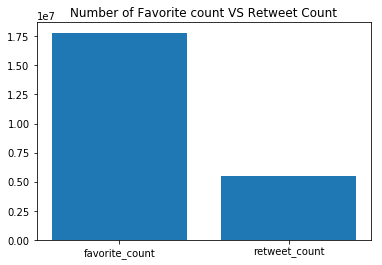

In [390]:
plt.bar(x=['favorite_count','retweet_count'], height = [data.favorite_count.sum(),data.retweet_count.sum()])
plt.title('Number of Favorite count VS Retweet Count')

***** So the first conclusion is : favorate count more than retweet count 

In [391]:
data[data.p1_conf > 0.5].p1.value_counts()

golden_retriever                  116
Pembroke                           70
Labrador_retriever                 65
Chihuahua                          47
pug                                43
Samoyed                            30
Pomeranian                         29
chow                               26
toy_poodle                         24
French_bulldog                     22
German_shepherd                    19
malamute                           18
Maltese_dog                        15
seat_belt                          15
cocker_spaniel                     14
web_site                           12
Cardigan                           12
Shetland_sheepdog                  12
Shih-Tzu                           11
Chesapeake_Bay_retriever           11
miniature_pinscher                 11
West_Highland_white_terrier        11
Bernese_mountain_dog               10
Staffordshire_bullterrier          10
vizsla                             10
Rottweiler                         10
Great_Pyrene

 the second conclusion: the most dog: golden_retriever 

In [392]:
data['rating'].value_counts()

1.200000      454
1.000000      421
1.100000      402
1.300000      261
0.900000      151
0.800000       95
0.700000       51
1.400000       35
0.500000       34
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
177.600000      1
2.600000        1
3.428571        1
0.636364        1
0.818182        1
42.000000       1
7.500000        1
2.700000        1
Name: rating, dtype: int64

#the third conclusion: most numerator are more than 10